# Eulers metode
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>
<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" title="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" style="width: 200px; float: right; margin-left: 30px;" src="img/Euler.png">

__[Eulers metode](https://en.wikipedia.org/wiki/Euler_method) er en algoritme for å finne numeriske løsninger til ordinære differensialligninger. Dette er en mye brukt [numerisk metode](https://no.wikipedia.org/wiki/Numerisk_analyse) for å finne løsninger på førsteordens differensiallikninger når du har en initialverdi.__

> Denne siden dekker helt eller delvis kompetansemålene: [Matematiske metoder 1](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#modellering)

La oss se på den enkle differensiallikningen $ y' = y $ og initialbetingelsen $ y(0) = 1 $.

Vi ønsker nå å bruke Eulers metode for å finne denne verdien numerisk. For å få til dette må vi starte et sted som vi vet noe om. I dette tilfellet bruker vi initialbetingelsen $ y(0) = 1 $, og starter derifra. Vi må også bestemme oss for en $ \Delta x $ som er hvor store "skritt" vi skal ta mellom hver beregning.

__Grunnprinsippet er at hver nye verdi beregnes med utgangspunkt i den forrige.__

Neste verdi kan da skrives som $ y_{n+1} = y_n + \Delta x \cdot f(x_n,y_n) $

der $ f(x_n,y_n) $ i dette tilfellet er $y_n$.

Vi skal nå regne ut $y'(0)$ med utgangspunkt i initialbetingelsen og lar $\Delta x = 1$. Vi vet at $y'=y$ og $y(0)=1$. Dette betyr at $y'(0)=1$.

Neste skritt er å øke $x$ med $\Delta x$ og regne ut en gang til.

$$y(1) = y(0) + \Delta x \cdot y(0) = 1 + 1 \cdot 1 = 2$$

Vi kan nå bruke dette resultatet til å regne ut neste verdi:
$$y(2) = y(1) + \Delta x \cdot y(1) = 2 + 1 \cdot 2 = 2$$

Slik kan vi fortsette helt til vi har regnet ut $y(5)$ som i tabellen under.

|$x$|$y$|$y'$|
|:--:|:--:|:--:|
|0|1|1|
|1|2|2|
|2|4|4|
|3|8|8|
|4|16|16|
|5|32|32|


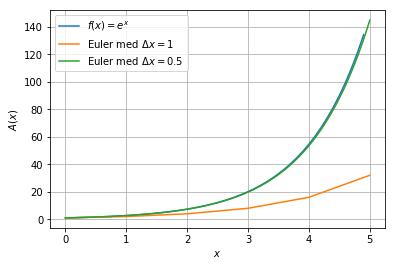

In [4]:
# TODO: Koden må renskrives og legges i funksjoner

# Importerer nødvendige biblioteker
import matplotlib.pyplot as plt
import numpy as np

#Initialbetingelser
y_0 = 1
step = 1

# Eksakt løsning
def A(x):
    return np.exp(x)

# Regner ut neste verdi av y
def y_n1(t, init, yn):
    return yn + t * yn

# x-verdier for plotting av eksakt løsning
x = np.arange(0,5,0.1)
y = []

# Regner ut eksakt løsning
for i in x:
    y.append(A(i))

# x-verdier for plotting av Euler med step = 1
xe = np.arange(0,5,step).tolist()
ye = [1]

for verdi in xe:
    ye.append(y_n1(step, y_0, ye[-1]))

#print(xe,ye)
xe.append(xe[-1] + step)

#print('x er {}\ny er {}'.format(xe,ye))

# Setter ny stepverdi (Delta x)
# Prøv å endre på denne og sjekk resultatet.
step = 0.5

# x-verdier for plotting av Euler med step = 0.5
xe1 = np.arange(0,5,step).tolist()
ye1 = [1]

for verdi in xe1:
    ye1.append(y_n1(step, y_0, ye1[-1]))

#print(xe1,ye1)
xe1.append(xe1[-1] + step)

#print('x er {}\ny er {}'.format(xe1,ye1))

    
# Utskrift av data
plt.grid() # Lager rutenett
plt.xlabel('$x$') # Merker x-aksen
plt.ylabel('$A(x)$') # Merker y-aksen
plt.plot(x, y, label='$f(x)=e^x$')
plt.plot(xe, ye, label='Euler med $\Delta x=1$')
plt.plot(xe1, ye1, label='Euler med $\Delta x=0.5$')
plt.legend()
plt.show()

## Oppgaver

1. Ta utgangspunkt i eksempelet over. Endre på step-verdien ($\Delta x$). Hva observerer du?
2. Kan du løse differensiallikningen $\frac{dy}{dx}=x+2y$ numerisk når $y(0)=0$. Bruk $\Delta x = 0.1$. Finn eksakt løsning med f.eks [Wolfram Alpha](http://www.wolframalpha.com), og sammenlign med funksjonen du kommer frem til.